### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Creating a dataframe for Fandango ratings

In [4]:
fandango=pd.read_csv("fandango_scrape.csv")


### Explore Fandango dataset

fandango.info()

In [6]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [7]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### Relationship between popularity of a film (no.of votes) and it's rating

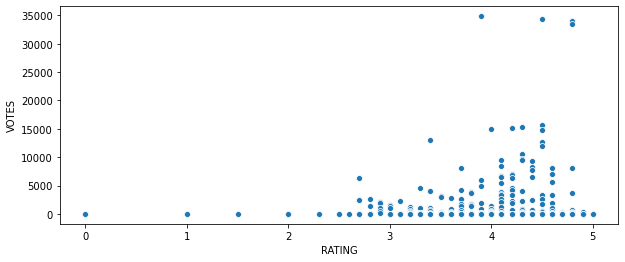

In [10]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

### Correlation between columns

In [11]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


### Splitting year from the film column and making a year column

In [20]:
 title_1=fandango['FILM'][0]

In [28]:
title_1.split("(")

['Fifty Shades of Grey ', '2015)']

In [34]:
title_1.split("(")[-1][:-1]

'2015'

In [39]:
fandango['YEAR']=fandango['FILM'].apply(lambda title:title.split("(")[-1][:-1])

In [40]:
fandango['YEAR'].unique()

array(['2015', '2014', '2016', '1964', '2012'], dtype=object)

### No.of movies per year

In [45]:
number_of_movies=fandango['YEAR'].value_counts()

In [46]:
number_of_movies

2015    478
2014     23
2016      1
2012      1
1964      1
Name: YEAR, dtype: int64

### Visualizing count of movies per year

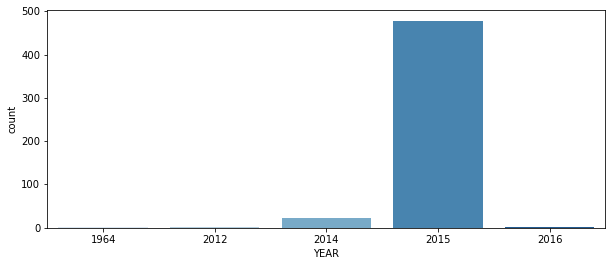

In [147]:
plt.figure(figsize=(10,4))
sns.countplot(data=fandango,x='YEAR',palette='Blues')
plt.show()

### Top 10 movies with the highest number of votes

In [49]:
fandango.nlargest(n=10,columns="VOTES")

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### Movie count with 0 votes

In [55]:
(fandango['VOTES']==0).sum()

69

### Creating a dataframe without films that has 0 vote count

In [67]:
reviewed1=fandango[fandango['VOTES']>0]

In [70]:
reviewed=reviewed1.copy()

In [71]:
reviewed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    435 non-null    object 
 1   STARS   435 non-null    float64
 2   RATING  435 non-null    float64
 3   VOTES   435 non-null    int64  
 4   YEAR    435 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 20.4+ KB


### KDE plot showing the difference in distributions of stars and rating

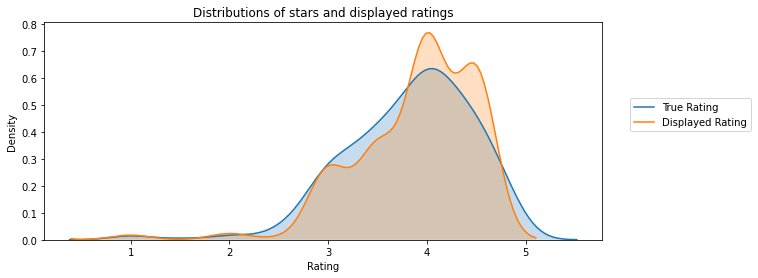

In [131]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=reviewed['RATING'],clip=[0,5],shade=True,label="True Rating")
sns.kdeplot(data=reviewed['STARS'],clip=[0,5],shade=True,label="Displayed Rating")
plt.legend(loc=(1.05,.5))
plt.xlabel("Rating")
plt.ylabel("Density")
plt.title("Distributions of stars and displayed ratings")
plt.show()

### TO quantify the discrepancies a newcolumn for difference in rating and stars is created

In [91]:
reviewed['DIFF']=round((reviewed['STARS']-reviewed['RATING']),2)

In [92]:
reviewed

,FILM,STARS,RATING,VOTES,YEAR,DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


### counting the no.of times a certain difference occurs

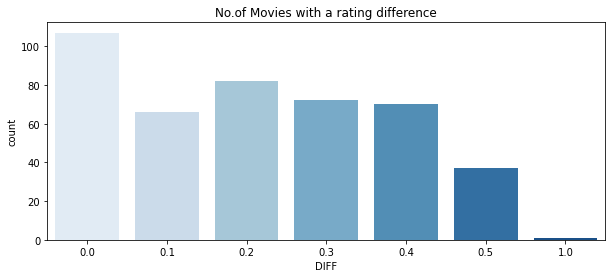

In [130]:
plt.figure(figsize=(10,4))
sns.countplot(data=reviewed,x='DIFF',palette='Blues')
plt.title("No.of Movies with a rating difference")
plt.show()

#### The plot says 1 movie had a rating difference of 1 . This makes me think that some ratings are manipulated

### Which movie had the   rating difference close to 1 ?

In [96]:
reviewed[reviewed['DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


### Comparison of fandango ratings to other sites

In [97]:
all_sites = pd.read_csv("all_sites_scores.csv")

### Explore the new dataframe

In [98]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [99]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [100]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

#### Exploring Rotten Tomatoes and Rotten Tomatoes user reviews-scatter plot

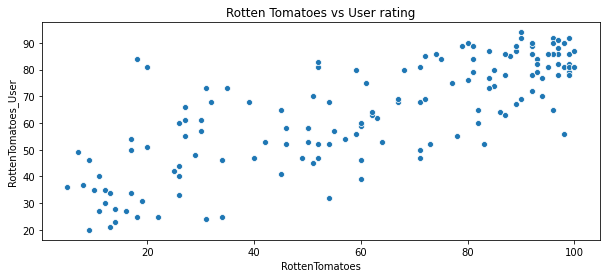

In [128]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.title("Rotten Tomatoes vs User rating")
plt.show()

#### To quantify this ,we can find the difference between Rotten tomatoes critics ratings and user ratings. 

In [104]:
all_sites['ROTTEN_DIFF']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

### Mean absolute difference between critics and user ratings-Rotten Tomatoes

In [105]:
all_sites['ROTTEN_DIFF'].apply(abs).mean()

15.095890410958905

### Distribution of rating difference -Rotten Tomatoes

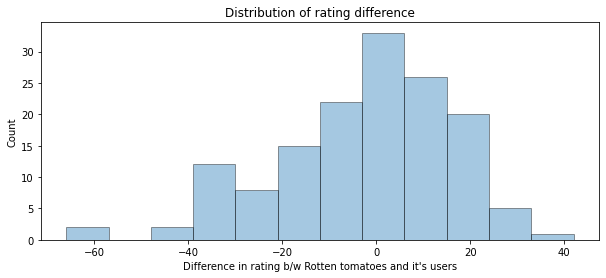

In [138]:
plt.figure(figsize=(10,4))
sns.distplot(all_sites['ROTTEN_DIFF'],kde=False,hist_kws={"edgecolor":"black"})
plt.xlabel("Difference in rating b/w Rotten tomatoes and it's users")
plt.ylabel("Count")
plt.title("Distribution of rating difference")
plt.show()

### Distribution showing the absolute value difference between critics and user rating-Rotten Tomatoes

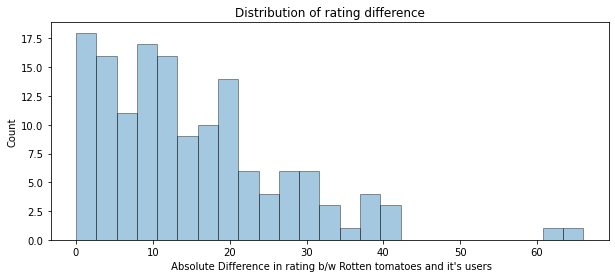

In [137]:

plt.figure(figsize=(10,4))
sns.distplot(all_sites['ROTTEN_DIFF'].apply(abs),kde=False,bins=25,hist_kws={"edgecolor":"black"})
plt.xlabel(" Absolute Difference in rating b/w Rotten tomatoes and it's users")
plt.ylabel("Count")
plt.title("Distribution of rating difference")
plt.show()

### Top 5 movies that users rated higher than critics

In [151]:
all_sites[all_sites['ROTTEN_DIFF']<0].sort_values('ROTTEN_DIFF').head(5)[['FILM','ROTTEN_DIFF']]

,FILM,ROTTEN_DIFF
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


### Top 5 movies that critcs rated higher than users

In [155]:
all_sites.nlargest(n=5,columns='ROTTEN_DIFF')[['FILM','ROTTEN_DIFF']]

,FILM,ROTTEN_DIFF
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


### Meta Critic

### User rating vs official display rating- Metacritic

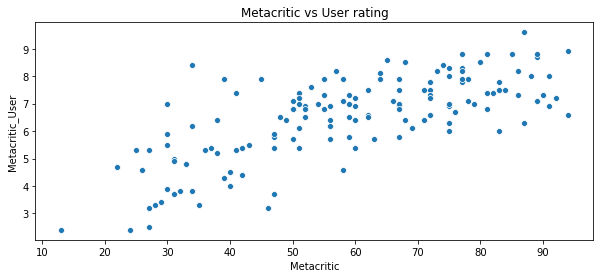

In [157]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.title("Metacritic vs User rating")
plt.show()

### IMDB

### Relationship between vote count on metacritic and vote count on IMDB

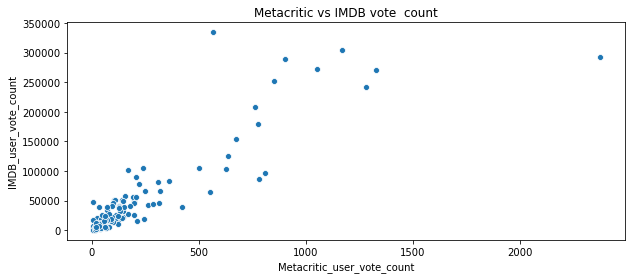

In [158]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')
plt.title("Metacritic vs IMDB vote  count")
plt.show()

#### What movie in IMDB has the highest vote count?

In [159]:
all_sites.nlargest(1,columns='IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTTEN_DIFF
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


#### What movie in Metacritic has the highest vote count?


In [160]:
all_sites.nlargest(1,columns='Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTTEN_DIFF
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


### Fandango vs All_sites

### Merge Fandango and All_sites dataframes(Inner Join)

In [162]:
merged=fandango.merge(all_sites,how='inner', on="FILM")

In [163]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  ROTTEN_DIFF                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [164]:
merged.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTTEN_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Normalizing columns to Fandango stars and rating of 0-5

    - Rotten Tomatoes ,Rotten Tomatoes user and Metacritic rating are out of 100
    - IMDB and Metacritic user rating are out of 10
      

In [170]:
merged['n_RT']=round(merged['RottenTomatoes']*(5/100),1)
merged['n_RT_User']=round(merged['RottenTomatoes']*(5/100),1)
merged['n_MC']=round(merged['Metacritic']*(5/100),1)
merged['n_MC_User']=round(merged['Metacritic_User']*(5/10),1)
merged['n_IMDB']=round(merged['IMDB']*(5/10),1)

In [171]:
merged.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTTEN_DIFF,n_RT,n_MC,n_MC_User,n_IMDB,n_RT_User
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.3,1.6,2.1,1.2
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,3.0,3.5,3.6,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,3.6,3.3,3.7,3.6
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,3.4,3.4,3.7,4.0
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.7,4.4,4.3,4.9


### Creating a dataframe that only contains the normalized ratings

In [175]:
normalized=merged[['STARS','RATING','n_RT','n_RT_User','n_MC','n_MC_User','n_IMDB']]

In [176]:
normalized.head()

,STARS,RATING,n_RT,n_RT_User,n_MC,n_MC_User,n_IMDB
0,4.0,3.9,1.2,1.2,2.3,1.6,2.1
1,4.5,4.5,3.6,3.6,3.0,3.5,3.6
2,5.0,4.8,3.6,3.6,3.6,3.3,3.7
3,5.0,4.8,4.0,4.0,3.4,3.4,3.7
4,4.5,4.5,4.9,4.9,4.7,4.4,4.3


### Fandango displays the stars higher than the rating , but are the ratings higher than the average?

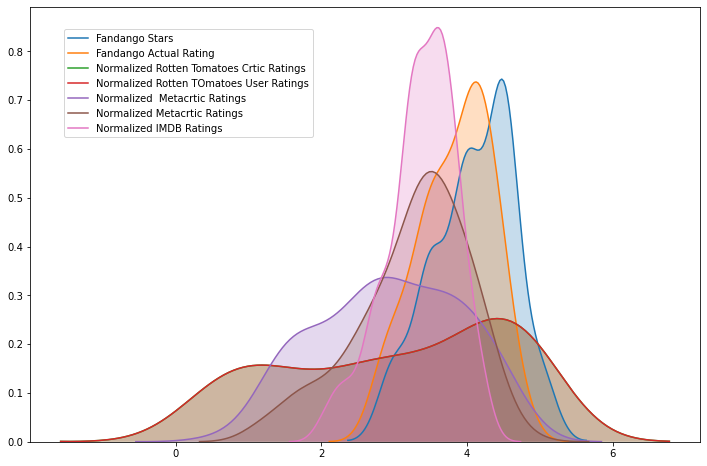

In [193]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=normalized['STARS'],shade=True,label="Fandango Stars")
sns.kdeplot(data=normalized['RATING'],shade=True,label="Fandango Actual Rating")
sns.kdeplot(data=normalized['n_RT'],shade=True,label="Normalized Rotten Tomatoes Crtic Ratings")
sns.kdeplot(data=normalized['n_RT_User'],shade=True,label="Normalized Rotten TOmatoes User Ratings")
sns.kdeplot(data=normalized['n_MC'],shade=True,label="Normalized  Metacrtic Ratings")
sns.kdeplot(data=normalized['n_MC_User'],shade=True,label="Normalized Metacrtic Ratings")
sns.kdeplot(data=normalized['n_IMDB'],shade=True,label="Normalized IMDB Ratings")
plt.legend(loc=(0.05,0.7))
plt.show()

#### Fandango has an uneven distribution, Rotten Tomatoes critic ratings has even distribution

### Comparison of Rotten Tomatoes critic and Fandango stars rating

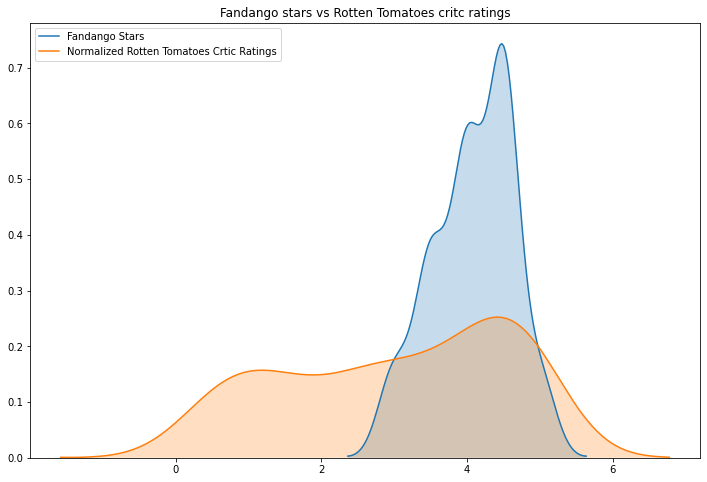

In [192]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=normalized['STARS'],shade=True,label="Fandango Stars")
sns.kdeplot(data=normalized['n_RT'],shade=True,label="Normalized Rotten Tomatoes Crtic Ratings")
plt.title("Fandango stars vs Rotten Tomatoes critc ratings")
plt.show()

### Cluster Map Visualization of all Normalized Scores

<Figure size 720x576 with 0 Axes>

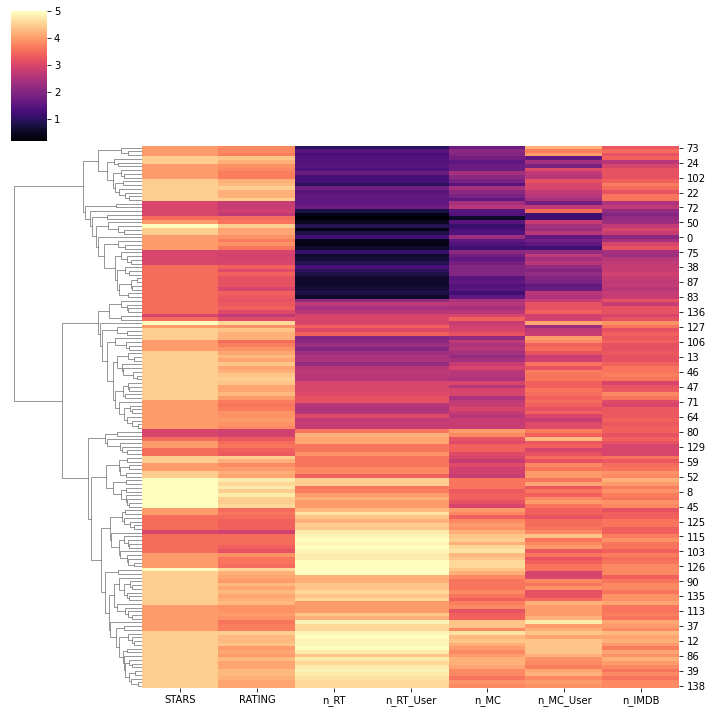

In [222]:
plt.figure(figsize=(10,8))
sns.clustermap(normalized,cmap='magma',col_cluster=False)


### Top 10 worst movies on Rotten tomatoes compared with Fandango rating


In [228]:
worst_movies=merged[['FILM','STARS','RATING','n_RT','n_RT_User','n_MC','n_MC_User','n_IMDB']].nsmallest(10,'n_RT')

In [229]:
worst_movies

,FILM,STARS,RATING,n_RT,n_RT_User,n_MC,n_MC_User,n_IMDB
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,0.2,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,0.4,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,0.4,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,0.4,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,0.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,0.5,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,0.6,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,0.6,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,0.6,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,0.6,1.6,1.9,2.7


### mean of all ratings compared with Fandango ratings

In [243]:
worst_movies['mean_all']=(worst_movies['n_RT']+worst_movies['n_RT_User']+worst_movies['n_MC']+worst_movies['n_MC_User']+
                          worst_movies['n_IMDB'])/5

In [244]:
worst_movies[['FILM','STARS','RATING','mean_all']]

,FILM,STARS,RATING,mean_all
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.88
25,Taken 3 (2015),4.5,4.1,1.48
28,Fantastic Four (2015),3.0,2.7,1.08
54,Hot Pursuit (2015),4.0,3.7,1.32
84,Hitman: Agent 47 (2015),4.0,3.9,1.36
50,The Boy Next Door (2015),4.0,3.6,1.52
77,Seventh Son (2015),3.5,3.2,1.50
78,Mortdecai (2015),3.5,3.2,1.40
83,Sinister 2 (2015),3.5,3.3,1.62
87,Unfinished Business (2015),3.5,3.2,1.48


### It's clearly seen than Fandango ratings are way too high compared with ratings from other sources

##### Movie Taken 3 received a whooping 4.5 rating while the mean score on other sites is a mere 1.48